### Student Information
Name: 劉艾薇 Ivy Liu

Student ID: 110010513

GitHub ID: IvyLiu47

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [154]:
### Begin Assignment Here

### 1. Take Home Exercises

Please refer to the file in [DM2022-Lab1-Master](https://github.com/IvyLiu47/DM2022-Lab1-Master.git), thank you!

### 2. 

In [155]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [156]:
import os
import numpy as np
import pandas as pd
import helpers.data_mining_helpers as dmh

#### 2.1 The Data

It contains sentences labelled with positive or negative sentiment, extracted from reviews of products, movies, and restaurants

#### 2.2 Data Preparation

In [157]:
#Load the data
path = 'sentiment labelled sentences/'

files = os.listdir(path)

sentence = []
score = []
sentiment = []

for filename in files:  
    if filename.endswith('.txt') and filename != 'readme.txt':
        file = os.path.join(path,filename)
        print(filename)
        fh = open(file, 'r',encoding="utf-8")
        L = fh.readlines()
        print(len(L))
        for string in L:
            new_list = string.split('\t')
            sentence.append(new_list[0])
            score.append(new_list[1].replace("\n", ""))
            if new_list[1].replace("\n", "") == '0':
                sentiment.append('negative')
            else:
                sentiment.append('positive')
            
print(len(sentence))
print(len(score))
print(len(sentiment)) 

amazon_cells_labelled.txt
1000
imdb_labelled.txt
1000
yelp_labelled.txt
1000
3000
3000
3000


#### 2.3 Data Transformation

In [158]:
#Convert into Pandas Dataframe
dictionary = {'sentence': sentence, 'score': score, 'sentiment': sentiment}
X = pd.DataFrame(dictionary)
X

,sentence,score,sentiment
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
...,...,...,...
2995,I think food should have flavor and texture an...,0,negative
2996,Appetite instantly gone.,0,negative
2997,Overall I was not impressed and would not go b...,0,negative
2998,"The whole experience was underwhelming, and I ...",0,negative


#### 2.4 Data Mining using Pandas

##### 2.4.1 Missing Values

In [159]:
# check missing values
X.isnull()

,sentence,score,sentiment
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


In [160]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [161]:
# Adding dummy record by using Series form
dummy_series = pd.Series(["dummy_record", '0'], index=["sentence", "score"])

In [162]:
dummy_series

sentence    dummy_record
score                  0
dtype: object

In [163]:
dummy_series.to_frame().T

,sentence,score
0,dummy_record,0


In [164]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [165]:
len(result_with_series)

3001

In [166]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [167]:
# Adding dummy record by using Dictionary form
dummy_dict = [{'sentence': 'dummy_record', 'score': '0'}]

In [168]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [169]:
len(X)

3001

In [170]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [171]:
X.dropna(inplace=True)

In [172]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [173]:
len(X)

3000

##### 2.4.2 Dealing with Duplicate Data

In [174]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [175]:
sum(X.duplicated())

17

Since there is duplicated data already, we don't need to make additional duplicated dummy data.

In [176]:
X.drop_duplicates(keep='first', inplace=True)

In [177]:
len(X)

2983

#### 2.5 Data Preprocessing

##### 2.5.1 Sampling

In [178]:
X_sample = X.sample(n=1000) #random state

In [179]:
len(X_sample)

1000

In [180]:
X_sample[0:7]

,sentence,score,sentiment
2944,The cashew cream sauce was bland and the veget...,0,negative
1411,Her role was played well.,1,positive
1670,This is a stunning movie.,1,positive
1629,His acting alongside Olivia De Havilland was b...,1,positive
1141,All the pretty pictures in the world cannot ma...,0,negative
1506,About half way through this film I started to ...,0,negative
127,it did not work in my cell phone plug i am ver...,0,negative


In [181]:
import matplotlib.pyplot as plt
%matplotlib inline

0    1493
1    1490
Name: score, dtype: int64


<AxesSubplot: title={'center': 'Sentiment distribution'}>

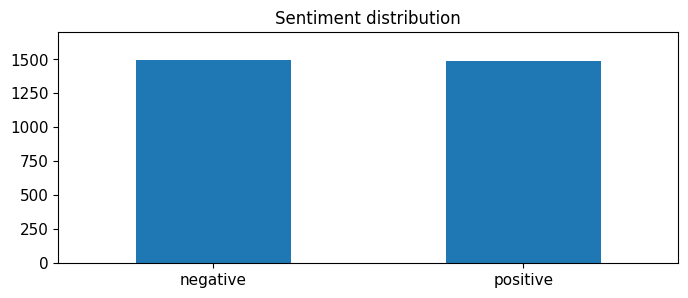

In [182]:
print(X.score.value_counts())

# plot barchart for X
X.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, 1700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

positive    510
negative    490
Name: sentiment, dtype: int64


<AxesSubplot: title={'center': 'Sentiment distribution'}>

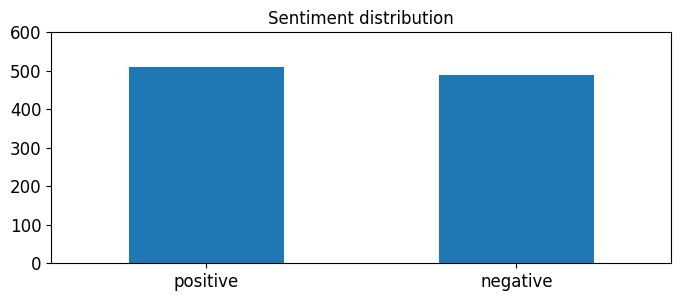

In [183]:
print(X_sample.sentiment.value_counts())

# plot barchart for X_sample
X_sample.sentiment.value_counts().plot(kind = 'bar',
                                           title = 'Sentiment distribution',
                                           ylim = [0, 600], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

##### 2.5.2 Feature Creation

In [184]:
import nltk
import sklearn

In [185]:
# takes a like a minute or two to process
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [186]:
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [187]:
X[0:4]

,sentence,score,sentiment,unigrams
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin..."


In [188]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

##### 2.5.3 Feature subset selection

In [189]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [190]:
count_vect.get_feature_names_out()[4987]

'way'

In [191]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [192]:
analyze(" ".join(list(X[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [193]:
X_counts.shape

(2983, 5155)

In [194]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [195]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [196]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [197]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:50]]

In [198]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:50]]

In [199]:
plot_z = X_counts[0:50, 0:50].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

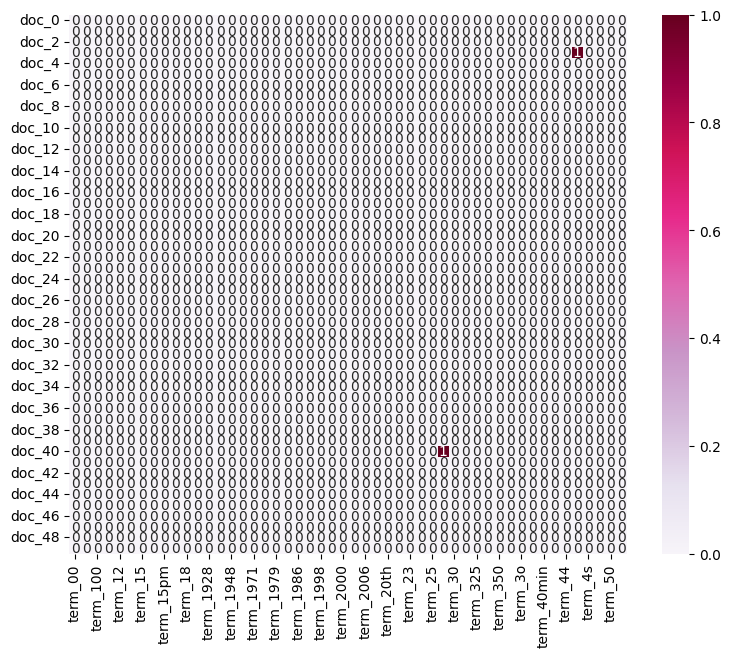

In [200]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

(2983, 5155)


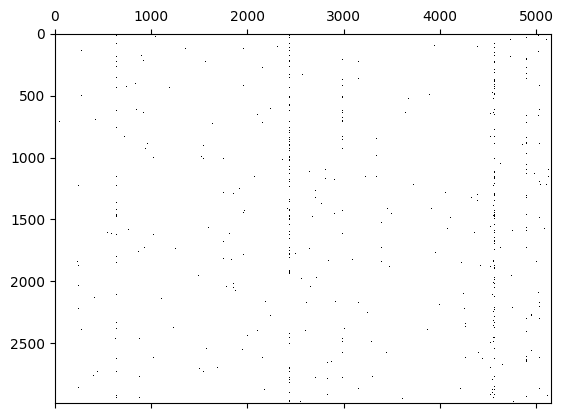

In [201]:
new_arr = X_counts[X_counts.getnnz(axis=1) != 0][:, X_counts.getnnz(axis=0) != 0].A
print(new_arr.shape)
plt.spy(X_counts.toarray(), aspect='auto')

##### 2.5.4 Dimensionality Reduction

In [202]:
from sklearn.decomposition import PCA

In [203]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [204]:
X_reduced.shape

(2983, 2)

In [205]:
categories = ['positive', 'negative']

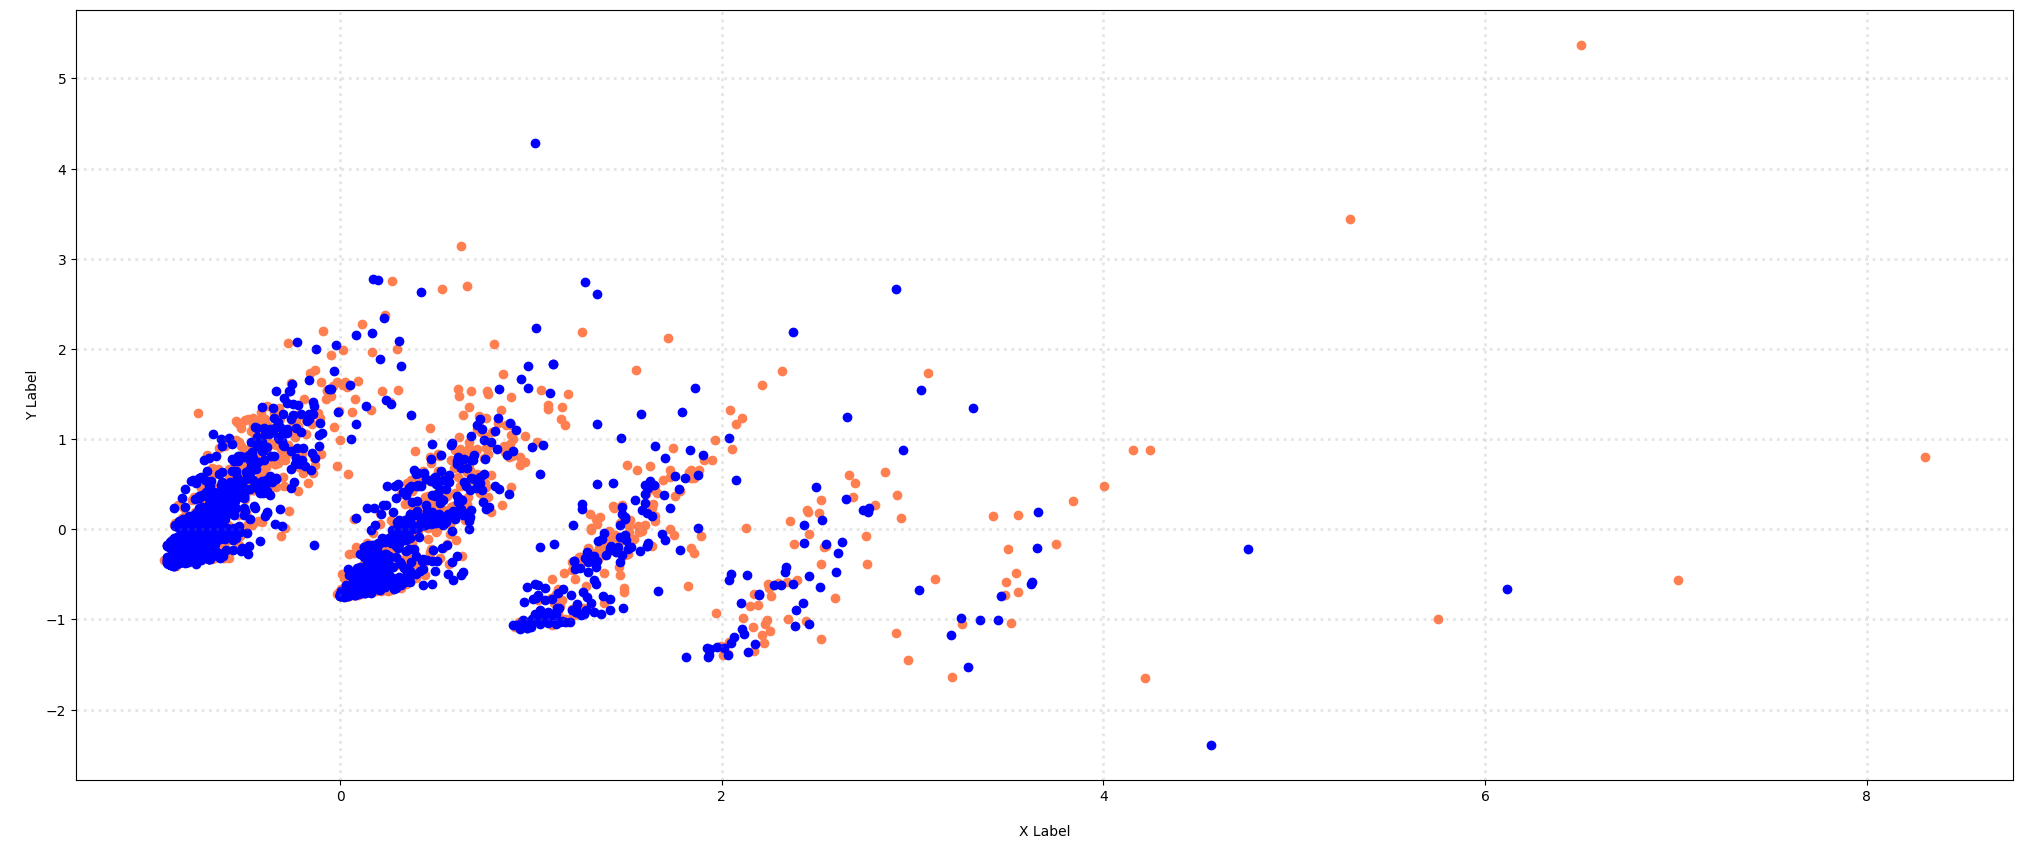

In [206]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['sentiment'] == category].T[0]
    ys = X_reduced[X['sentiment'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [207]:
from sklearn.decomposition import PCA
X_reduced3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced3.shape)
categories

(2983, 3)


['positive', 'negative']

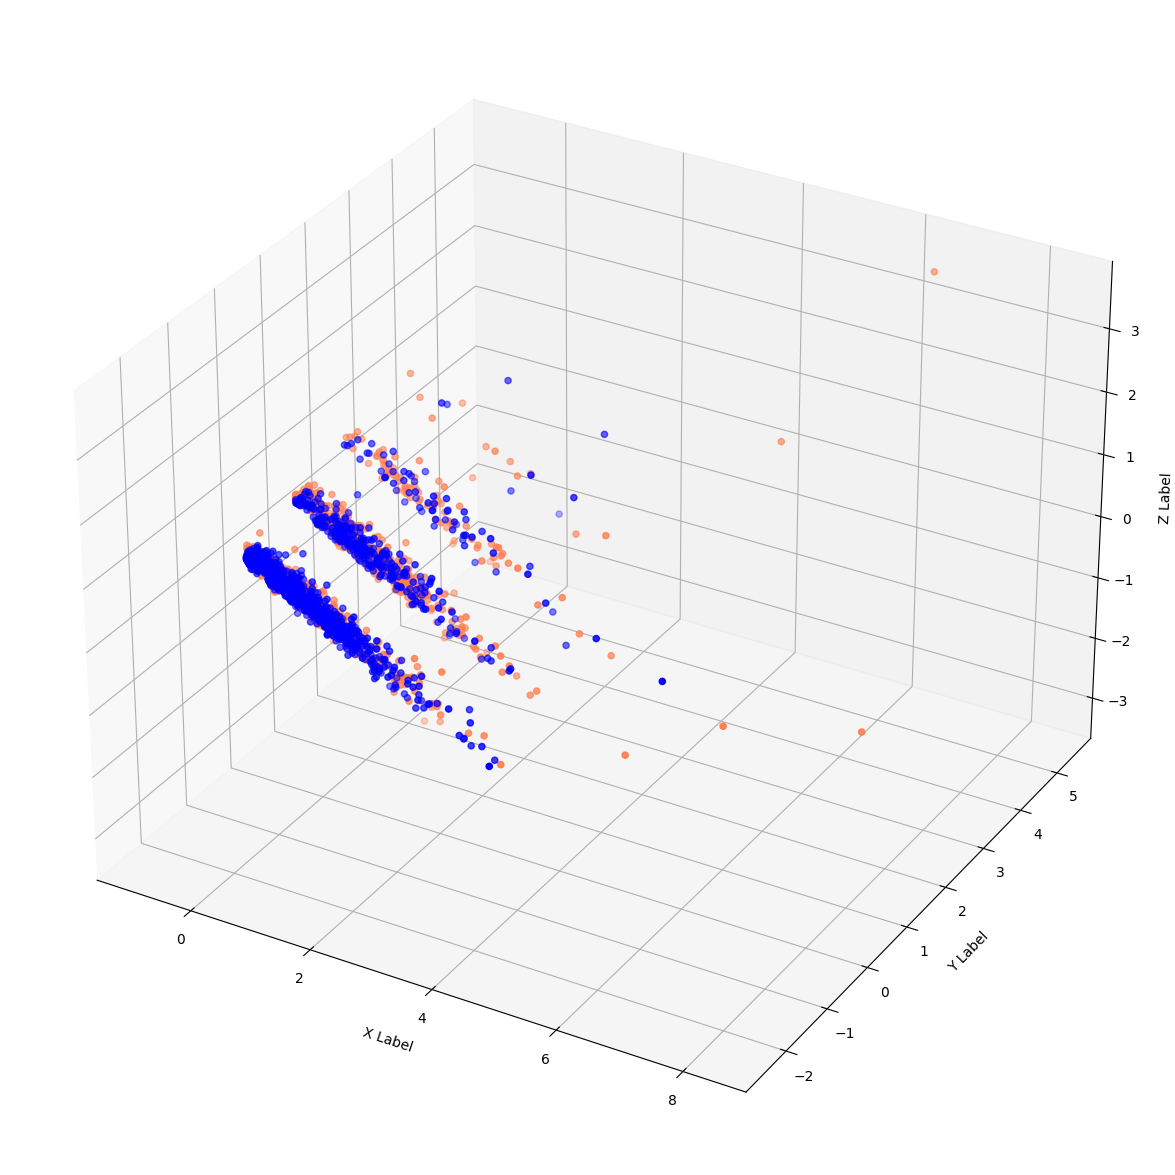

In [208]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced3[X['sentiment'] == category].T[0]
    ys = X_reduced3[X['sentiment'] == category].T[1]
    zs = X_reduced3[X['sentiment'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')


ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

##### 2.5.5 Attribute Transformation / Aggregation

In [209]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [210]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [211]:
term_frequencies[7] 

1

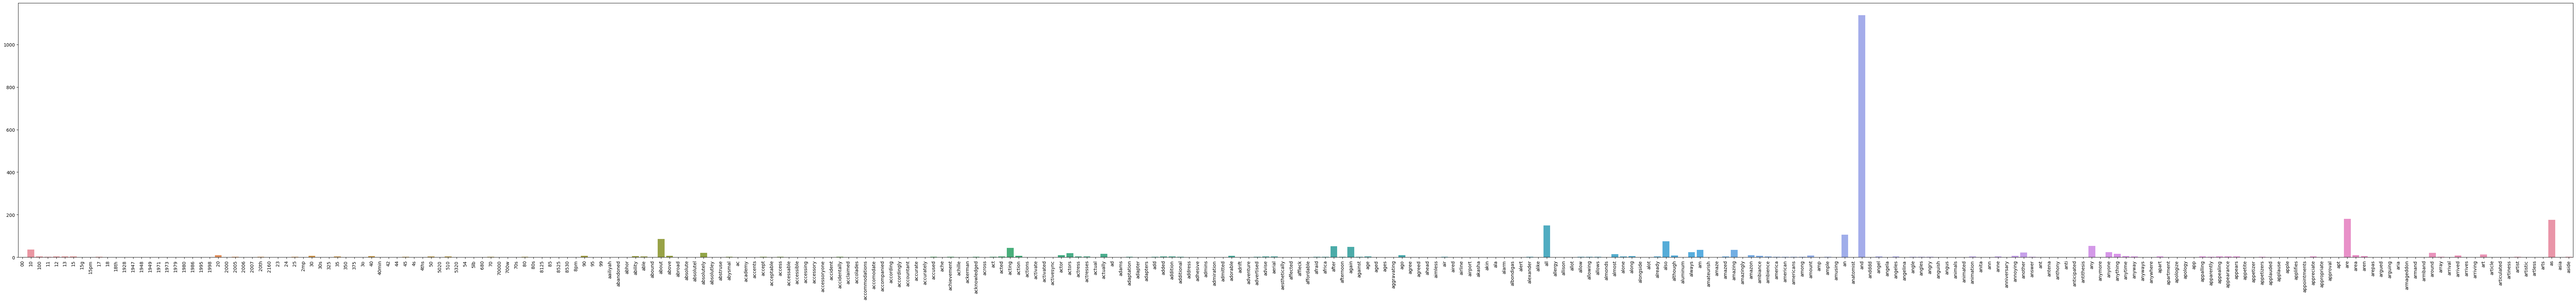

In [212]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [213]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

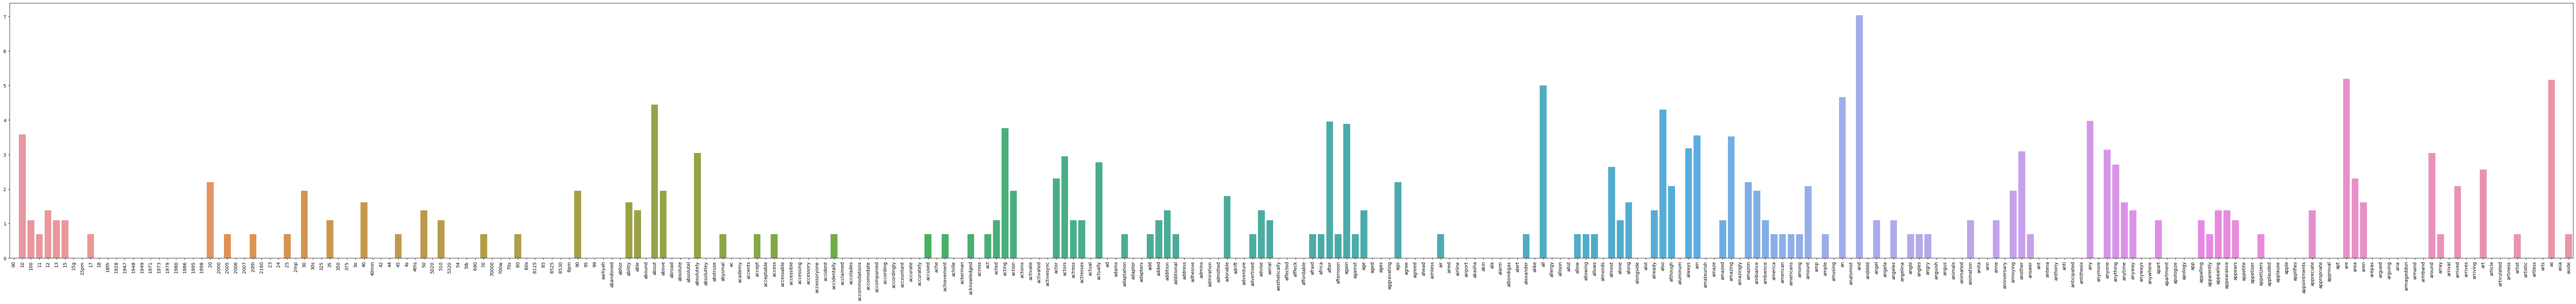

In [214]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

##### 2.5.6 Discretization and Binarization

In [215]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [216]:
mlb = preprocessing.LabelBinarizer()

In [217]:
mlb.fit(X.sentiment)

LabelBinarizer()

In [218]:
X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()

In [219]:
X[0:9]

,sentence,score,sentiment,unigrams,bin_sentiment
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


#### 2.6. Data Exploration

In [224]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[20]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[30]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[40]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [225]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["I went on Motorola's website and followed all directions, but could not get it to pair again."]
['This is a simple little phone to use, but the breakage is unacceptible.']
['It has a great camera thats 2MP, and the pics are nice and clear with great picture quality.']


In [226]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [227]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.133631
Cosine Similarity using count bw 1 and 3: 0.163663
Cosine Similarity using count bw 2 and 3: 0.058321
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


### 3.

#### 4.

#### 5.

Thank you for your patience! :)